# Plotting Nitrobacter Affinity Data
Zach Flinkstrom - May 2024 \
**Goal:** Plot kinetic parameters from microrespirometry of *Nitrobacter* isolates. Plot oxygen traces and model fits.\
To be run in "NOB" conda environment

In [11]:
import pandas as pd
import numpy as np
import altair as alt
from scipy.stats import f_oneway, tukey_hsd
import matplotlib.pyplot as plt

# Plot summarized kinetic parameter data

In [12]:
df = pd.read_excel('data/Affinity_summary_tidy.xlsx')
df.head()

Species Strain Parameter      Value
0  N. vulgaris      Z    Km_NO2  12.549247
1  N. vulgaris      Z    Km_NO2  18.151984
2  N. vulgaris      Z    Km_NO2  13.315989
3  N. vulgaris      Z    Km_NO2  12.053870
4  N. vulgaris      Z    Km_NO2  10.046136

In [13]:
df["Organism"] = df.Species + " " + df.Strain

In [14]:
Km_NO2 = alt.Chart(data=df[df.Parameter=='Km_NO2']).mark_point(size=20).encode(
            alt.X('Organism:N', axis=alt.Axis(labelAngle=-45, labels=False, title="")),
            alt.Y('Value:Q', title='Nitrite (\u03BCM)')).properties(height=150, width=200, title='Nitrite Affinity')

mean_Km_NO2 = alt.Chart(data=df[df.Parameter=='Km_NO2']).mark_tick(width=20, color='black').encode(
            alt.X('Organism:N', axis=alt.Axis(labelAngle=-45, labels=False, title="")),
            alt.Y('mean(Value):Q', title='Nitrite (\u03BCM)')).properties(height=150, width=200)

Km_O2 = alt.Chart(data=df[df.Parameter=='Km_O2']).mark_point().encode(
            alt.X('Organism:N', axis=alt.Axis(labelAngle=-45, labels=False, title="")),
            alt.Y('Value:Q', title='Oxygen (\u03BCM)')).properties(height=150, width=200, title='Oxygen Affinity')

mean_Km_O2 = alt.Chart(data=df[df.Parameter=='Km_O2']).mark_tick(width=20, color='black').encode(
            alt.X('Organism:N', axis=alt.Axis(labelAngle=-45, labels=False, title="")),
            alt.Y('mean(Value):Q', title='Oxygen (\u03BCM)')).properties(height=150, width=200)

q = alt.Chart(data=df[df.Parameter=='q']).mark_point().encode(
            alt.X('Organism:N', axis=alt.Axis(labelAngle=-45, labelFontStyle="italic", title="")),
            alt.Y('Value:Q', title='V\u2098\u2090\u2093 (fmol-N/cell/hr)')).properties(height=150, width=200, title='Max Cell-Specific Rate')

mean_q = alt.Chart(data=df[df.Parameter=='q']).mark_tick(width=20, color='black').encode(
            alt.X('Organism:N', axis=alt.Axis(labelAngle=-45, title="")),
            alt.Y('mean(Value):Q', title='V\u2098\u2090\u2093 (fmol-N/cell/hr)')).properties(height=150, width=200)

figure = (mean_Km_NO2+Km_NO2 & mean_Km_O2+Km_O2 & mean_q+q).configure_axis(labelFontSize=14, titleFontSize=14)
figure.save('figures/Affinity_summary.svg')
figure

alt.VConcatChart(...)

# Plot Michaelis-Menton model fits over raw data

In [15]:
def plot_mm(df, strain, cell_count):
    '''Create a function that takes data frame and plots based on strain and cell count'''
    cell_rate = df[strain+' - 60 sec average NO2 rate (μmol/L per hr)']/cell_count*1e9/2 
    cell_fit = df[strain+'_Fit']/cell_count*1e9/2
    conc = df[strain+'_Nitrite_uM']
    plot_df = pd.DataFrame({'Nitrite_uM':conc, 'Measured_rate': cell_rate, 'Fit_rate': cell_fit})
    
    measured_plot = alt.Chart(data=plot_df).mark_circle(size=10, clip=True).encode(
                        alt.X('Nitrite_uM:Q', title='Nitrite Concentration (\u03BCM)', scale=alt.Scale(domain=[0,250])),
                        alt.Y('Measured_rate:Q', title='Oxygen Uptake Rate (fmol/cell/hr)', scale=alt.Scale(domain=[0,2]))).properties(
                        height=200, width=300)
    
    fit_plot = alt.Chart(data=plot_df).mark_line(size=4, color='orange', opacity=0.65, clip=True).encode(
                                        alt.X('Nitrite_uM:Q'),
                                        alt.Y('Fit_rate:Q')).properties(
                                        height=200, width=300)
    return (measured_plot+fit_plot)

In [16]:
s22_cellcount_429 = 3.83e11 #cells/L
s22_cellcount_430 = 2.41e11
s22_cellcount_506 = 4.67e11

s1=plot_mm(pd.read_excel('data/20240429 Nitrobacter vulgaris NO2 O2 affinity 1.xlsx', sheet_name='Nitrite_1'), 'MLSD-S22', s22_cellcount_429)
s2=plot_mm(pd.read_excel('data/20240429 Nitrobacter vulgaris NO2 O2 affinity 1.xlsx', sheet_name='Nitrite_2'), 'MLSD-S22', s22_cellcount_429)
s3=plot_mm(pd.read_excel('data/20240430 Nitrobacter vulgaris NO2 O2 affinity 2.xlsx', sheet_name='Nitrite_1'), 'MLSD-S22', s22_cellcount_430)
s4=plot_mm(pd.read_excel('data/20240430 Nitrobacter vulgaris NO2 O2 affinity 2.xlsx', sheet_name='Nitrite_2'), 'MLSD-S22', s22_cellcount_430)
s5=plot_mm(pd.read_excel('data/20240506 Nitrobacter vulgaris NO2 O2 affinity 3.xlsx', sheet_name='Nitrite_1'), 'MLSD-S22', s22_cellcount_506)
s6=plot_mm(pd.read_excel('data/20240506 Nitrobacter vulgaris NO2 O2 affinity 3.xlsx', sheet_name='Nitrite_2'), 'MLSD-S22', s22_cellcount_506)

(s1+s2+s3+s4+s5+s6).configure_axis(labelFontSize=14, titleFontSize=14).configure_title(fontStyle="italic", fontSize=14).properties(title='Nitrobacter vulgaris MLSD-S22')

alt.LayerChart(...)

In [17]:
z_cellcount_429 = 5.21e11 #cells/L
z_cellcount_430 = 3.54e11
z_cellcount_506 = 1.52e12

z1=plot_mm(pd.read_excel('data/20240429 Nitrobacter vulgaris NO2 O2 affinity 1.xlsx', sheet_name='Nitrite_1'), 'Strain-Z', z_cellcount_429)
z2=plot_mm(pd.read_excel('data/20240429 Nitrobacter vulgaris NO2 O2 affinity 1.xlsx', sheet_name='Nitrite_2'), 'Strain-Z', z_cellcount_429)
z3=plot_mm(pd.read_excel('data/20240430 Nitrobacter vulgaris NO2 O2 affinity 2.xlsx', sheet_name='Nitrite_1'), 'Strain-Z', z_cellcount_430)
z4=plot_mm(pd.read_excel('data/20240430 Nitrobacter vulgaris NO2 O2 affinity 2.xlsx', sheet_name='Nitrite_2'), 'Strain-Z', z_cellcount_430)
z5=plot_mm(pd.read_excel('data/20240506 Nitrobacter vulgaris NO2 O2 affinity 3.xlsx', sheet_name='Nitrite_1'), 'Strain-Z', z_cellcount_506)
z6=plot_mm(pd.read_excel('data/20240506 Nitrobacter vulgaris NO2 O2 affinity 3.xlsx', sheet_name='Nitrite_2'), 'Strain-Z', z_cellcount_506)

(z1+z2+z3+z4+z5+z6).configure_axis(labelFontSize=14, titleFontSize=14).configure_title(fontStyle="italic", fontSize=14).properties(title='Nitrobacter vulgaris Strain Z')

alt.LayerChart(...)

In [18]:
Nwino_cellcount1 = 4.84e11
Nwino_cellcount2 = 4.82e11

n1=plot_mm(pd.read_excel('data/20240507 Nitrobacter winogradskyi NO2 O2 affinity.xlsx', sheet_name='Nitrite_1'), 'Nwino-1', Nwino_cellcount1)
n2=plot_mm(pd.read_excel('data/20240507 Nitrobacter winogradskyi NO2 O2 affinity.xlsx', sheet_name='Nitrite_2'), 'Nwino-1', Nwino_cellcount1)
n3=plot_mm(pd.read_excel('data/20240507 Nitrobacter winogradskyi NO2 O2 affinity.xlsx', sheet_name='Nitrite_1'), 'Nwino-2', Nwino_cellcount2)
n4=plot_mm(pd.read_excel('data/20240507 Nitrobacter winogradskyi NO2 O2 affinity.xlsx', sheet_name='Nitrite_2'), 'Nwino-2', Nwino_cellcount2)
n5=plot_mm(pd.read_excel('data/20240507 Nitrobacter winogradskyi NO2 O2 affinity 2.xlsx', sheet_name='Nitrite_1'), 'Nwino-1', Nwino_cellcount1)
n6=plot_mm(pd.read_excel('data/20240507 Nitrobacter winogradskyi NO2 O2 affinity 2.xlsx', sheet_name='Nitrite_2'), 'Nwino-1', Nwino_cellcount1)
n7=plot_mm(pd.read_excel('data/20240507 Nitrobacter winogradskyi NO2 O2 affinity 2.xlsx', sheet_name='Nitrite_1'), 'Nwino-2', Nwino_cellcount2)
n8=plot_mm(pd.read_excel('data/20240507 Nitrobacter winogradskyi NO2 O2 affinity 2.xlsx', sheet_name='Nitrite_2'), 'Nwino-2', Nwino_cellcount2)

(n1+n2+n3+n4+n5+n6+n7+n8).configure_axis(labelFontSize=14, titleFontSize=14).configure_title(fontStyle="italic", fontSize=14).properties(title='Nitrobacter winogradskyi Strain Nb-255')

alt.LayerChart(...)

In [19]:
figure = ((s1+s2+s3+s4+s5+s6).properties(title='Nitrobacter vulgaris MLSD-S22') | \
(z1+z2+z3+z4+z5+z6).properties(title='Nitrobacter vulgaris Z') | \
(n1+n2+n3+n4+n5+n6+n7+n8).properties(title='Nitrobacter winogradskyi Nb-255')).configure_axis(
    labelFontSize=14, titleFontSize=14).configure_title(fontStyle="italic", fontSize=16)
figure.save('figures/nitrite_mm_plots.svg')
figure

alt.HConcatChart(...)

# Plot Michaelis-Menton plots for oxygen affinities

In [20]:
def plot_O2_mm(df, strain, cell_count):
    '''Create a function that takes data frame and plots based on strain and cell count'''
    cell_rate = df[strain+' - 60 sec average O2 rate (μmol/L per hr)']/cell_count*1e9 
    cell_fit = df[strain+'_Fit']/cell_count*1e9
    conc = df[strain+' - O2 (μmol/L)']
    plot_df = pd.DataFrame({'Oxygen_uM':conc, 'Measured_rate': cell_rate, 'Fit_rate': cell_fit})
    
    measured_plot = alt.Chart(data=plot_df).mark_circle(size=10, clip=True).encode(
                        alt.X('Oxygen_uM:Q', title='Oxygen Concentration (\u03BCM)', scale=alt.Scale(domain=[0,100])),
                        alt.Y('Measured_rate:Q', title='Oxygen Uptake Rate (fmol/cell/hr)', scale=alt.Scale(domain=[0,2]))).properties(
                        height=200, width=300)
    
    fit_plot = alt.Chart(data=plot_df).mark_line(size=4, color='orange', opacity=0.65, clip=True).encode(
                                        alt.X('Oxygen_uM:Q'),
                                        alt.Y('Fit_rate:Q')).properties(
                                        height=200, width=300)
    return (measured_plot+fit_plot)

In [21]:
s22_cellcount_429 = 3.83e11 #cells/L
s22_cellcount_430 = 2.41e11
s22_cellcount_506 = 4.67e11

s1=plot_O2_mm(pd.read_excel('data/20240429 Nitrobacter vulgaris NO2 O2 affinity 1.xlsx', sheet_name='O2'), 'MLSD-S22', s22_cellcount_429)
s2=plot_O2_mm(pd.read_excel('data/20240430 Nitrobacter vulgaris NO2 O2 affinity 2.xlsx', sheet_name='O2'), 'MLSD-S22', s22_cellcount_430)
s3=plot_O2_mm(pd.read_excel('data/20240506 Nitrobacter vulgaris NO2 O2 affinity 3.xlsx', sheet_name='O2'), 'MLSD-S22', s22_cellcount_506)

(s1+s2+s3).properties(title='Nitrobacter vulgaris MLSD-S22')

alt.LayerChart(...)

In [22]:
z_cellcount_429 = 5.21e11 #cells/L
z_cellcount_430 = 3.54e11
z_cellcount_506 = 1.52e12

z1=plot_O2_mm(pd.read_excel('data/20240429 Nitrobacter vulgaris NO2 O2 affinity 1.xlsx', sheet_name='O2'), 'Strain-Z', z_cellcount_429)
z2=plot_O2_mm(pd.read_excel('data/20240430 Nitrobacter vulgaris NO2 O2 affinity 2.xlsx', sheet_name='O2'), 'Strain-Z', z_cellcount_430)
z3=plot_O2_mm(pd.read_excel('data/20240506 Nitrobacter vulgaris NO2 O2 affinity 3.xlsx', sheet_name='O2'), 'Strain-Z', z_cellcount_506)

(z1+z2+z3).properties(title='Nitrobacter vulgaris Strain Z')

alt.LayerChart(...)

In [23]:
Nwino_cellcount1 = 4.84e11
Nwino_cellcount2 = 4.82e11

n1=plot_O2_mm(pd.read_excel('data/20240507 Nitrobacter winogradskyi NO2 O2 affinity.xlsx', sheet_name='O2'), 'Nwino-1', Nwino_cellcount1)
n2=plot_O2_mm(pd.read_excel('data/20240507 Nitrobacter winogradskyi NO2 O2 affinity.xlsx', sheet_name='O2'), 'Nwino-2', Nwino_cellcount2)
n3=plot_O2_mm(pd.read_excel('data/20240507 Nitrobacter winogradskyi NO2 O2 affinity 2.xlsx', sheet_name='O2'), 'Nwino-1', Nwino_cellcount1)
n4=plot_O2_mm(pd.read_excel('data/20240507 Nitrobacter winogradskyi NO2 O2 affinity 2.xlsx', sheet_name='O2'), 'Nwino-2', Nwino_cellcount2)

(n1+n2+n3+n4).properties(title='Nitrobacter winogradskyi Strain Nb-255')

alt.LayerChart(...)

In [24]:
figure = ((s1+s2+s3).properties(title='Nitrobacter vulgaris MLSD-S22') | \
(z1+z2+z3).properties(title='Nitrobacter vulgaris Z') | \
(n1+n2+n3+n4).properties(title='Nitrobacter winogradskyi Nb-255')).configure_axis(
    labelFontSize=14, titleFontSize=14).configure_title(fontStyle="italic", fontSize=16)
figure.save('figures/oxygen_mm_plots.svg')
figure

alt.HConcatChart(...)

# Statistics

In [25]:
f_oneway(df[(df.Parameter=='Km_NO2')&(df.Organism=='N. vulgaris Z')].Value,
        df[(df.Parameter=='Km_NO2')&(df.Organism=='N. vulgaris MLSD-S22')].Value,
        df[(df.Parameter=='Km_NO2')&(df.Organism=='N. winogradskyi Nb-255')].Value)

F_onewayResult(statistic=25.70335775821675, pvalue=7.2523132251455965e-06)

In [26]:
tukey_hsd(df[(df.Parameter=='Km_NO2')&(df.Organism=='N. vulgaris Z')].Value,
        df[(df.Parameter=='Km_NO2')&(df.Organism=='N. vulgaris MLSD-S22')].Value,
        df[(df.Parameter=='Km_NO2')&(df.Organism=='N. winogradskyi Nb-255')].Value).pvalue

array([[1.00000000e+00, 9.51902383e-01, 2.68231279e-05],
       [9.51902383e-01, 1.00000000e+00, 5.01244109e-05],
       [2.68231279e-05, 5.01244109e-05, 1.00000000e+00]])

**No significant difference between N. vulgaris strain Km for NO2, but they are significantly higher than N. winogradskyi (p<0.0001)**

In [27]:
f_oneway(df[(df.Parameter=='Km_O2')&(df.Organism=='N. vulgaris Z')].Value,
        df[(df.Parameter=='Km_O2')&(df.Organism=='N. vulgaris MLSD-S22')].Value,
        df[(df.Parameter=='Km_O2')&(df.Organism=='N. winogradskyi Nb-255')].Value)

F_onewayResult(statistic=17.68239138748427, pvalue=0.0018336890702597673)

In [28]:
tukey_hsd(df[(df.Parameter=='Km_O2')&(df.Organism=='N. vulgaris Z')].Value,
        df[(df.Parameter=='Km_O2')&(df.Organism=='N. vulgaris MLSD-S22')].Value,
        df[(df.Parameter=='Km_O2')&(df.Organism=='N. winogradskyi Nb-255')].Value).pvalue

array([[1.        , 0.93666808, 0.00467161],
       [0.93666808, 1.        , 0.00309931],
       [0.00467161, 0.00309931, 1.        ]])

**No significant difference between N. vulgaris strain Km for O2, but they are significantly higher than N. winogradskyi (p<0.01)**

In [29]:
f_oneway(df[(df.Parameter=='q')&(df.Organism=='N. vulgaris Z')].Value,
        df[(df.Parameter=='q')&(df.Organism=='N. vulgaris MLSD-S22')].Value,
        df[(df.Parameter=='q')&(df.Organism=='N. winogradskyi Nb-255')].Value)

F_onewayResult(statistic=26.215844144001583, pvalue=6.391093394537443e-06)

In [30]:
tukey_hsd(df[(df.Parameter=='q')&(df.Organism=='N. vulgaris Z')].Value,
        df[(df.Parameter=='q')&(df.Organism=='N. vulgaris MLSD-S22')].Value,
        df[(df.Parameter=='q')&(df.Organism=='N. winogradskyi Nb-255')].Value).pvalue

array([[1.00000000e+00, 8.66088956e-05, 7.87218435e-06],
       [8.66088956e-05, 1.00000000e+00, 6.74513100e-01],
       [7.87218435e-06, 6.74513100e-01, 1.00000000e+00]])

**This one's interesting: N. vulgaris strain Z has a significantly lower cell-specific uptake rate compared to both MLSD-S22 and N. winogradskyi (p<0.0001)**

## Plot raw oxygen traces

In [31]:
raw1 = pd.read_excel('data/20240507 Nitrobacter winogradskyi NO2 O2 affinity.xlsx', sheet_name='Data')
raw2 = pd.read_excel('data/20240507 Nitrobacter winogradskyi NO2 O2 affinity 2.xlsx', sheet_name='Data')

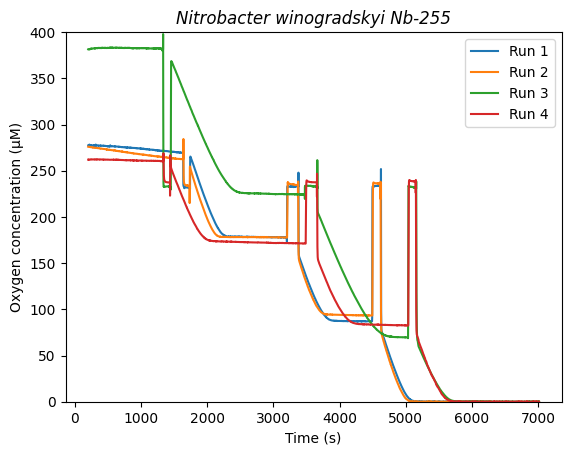

In [32]:
# Plot raw traces for N. wino
plt.plot(raw1['Time since start (s)'][200:], raw1['Nwino-1 - O2 (μmol/L)'][200:], label='Run 1')
plt.plot(raw1['Time since start (s)'][200:], raw1['Nwino-2 - O2 (μmol/L)'][200:], label='Run 2')
plt.plot(raw2['Time since start (s)'][200:], raw2['Nwino-1 - O2 (μmol/L)'][200:], label='Run 3')
plt.plot(raw2['Time since start (s)'][200:], raw2['Nwino-2 - O2 (μmol/L)'][200:], label='Run 4')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Oxygen concentration (μM)')
plt.title('Nitrobacter winogradskyi Nb-255', style='italic')
plt.ylim([0,400])
plt.savefig('figures/Nwino_o2_trace.svg')
plt.show()

In [33]:
raw3 = pd.read_excel('data/20240429 Nitrobacter vulgaris NO2 O2 affinity 1.xlsx', sheet_name='Data')
raw4 = pd.read_excel('data/20240430 Nitrobacter vulgaris NO2 O2 affinity 2.xlsx', sheet_name='Data')
raw5 = pd.read_excel('data/20240506 Nitrobacter vulgaris NO2 O2 affinity 3.xlsx', sheet_name='Data')

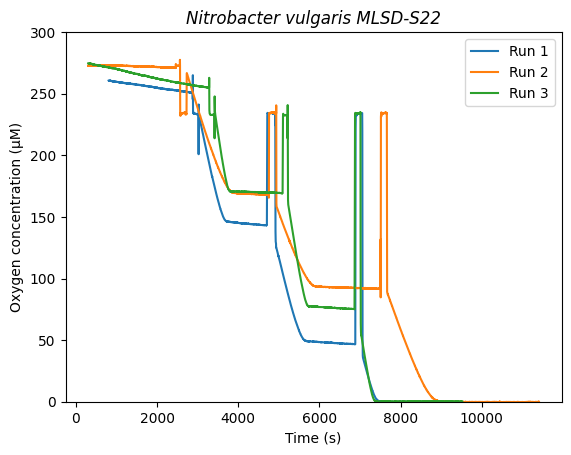

In [34]:
# Plot raw traces for N. wino
plt.plot(raw3['Time since start (s)'][800:], raw3['MLSD-S22 - O2 (μmol/L)'][800:], label='Run 1')
plt.plot(raw4['Time since start (s)'][300:], raw4['MLSD-S22 - O2 (μmol/L)'][300:], label='Run 2')
plt.plot(raw5['Time since start (s)'][300:], raw5['MLSD-S22 - O2 (μmol/L)'][300:], label='Run 3')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Oxygen concentration (μM)')
plt.title('Nitrobacter vulgaris MLSD-S22', style='italic')
plt.ylim([0,300])
plt.savefig('figures/Nvulg_MLSD-S22_o2_trace.svg')
plt.show()

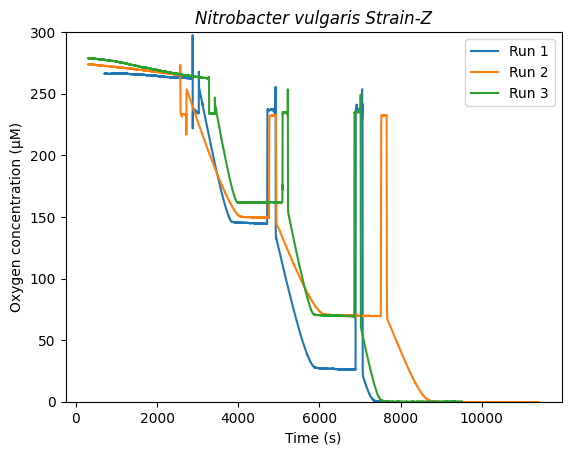

In [35]:
# Plot raw traces for N. wino
plt.plot(raw3['Time since start (s)'][700:], raw3['Strain-Z - O2 (μmol/L)'][700:], label='Run 1')
plt.plot(raw4['Time since start (s)'][300:], raw4['Strain-Z - O2 (μmol/L)'][300:], label='Run 2')
plt.plot(raw5['Time since start (s)'][300:], raw5['Strain-Z - O2 (μmol/L)'][300:], label='Run 3')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Oxygen concentration (μM)')
plt.title('Nitrobacter vulgaris Strain-Z', style='italic')
plt.ylim([0,300])
plt.savefig('figures/Nvulg_Z_o2_trace.svg')
plt.show()